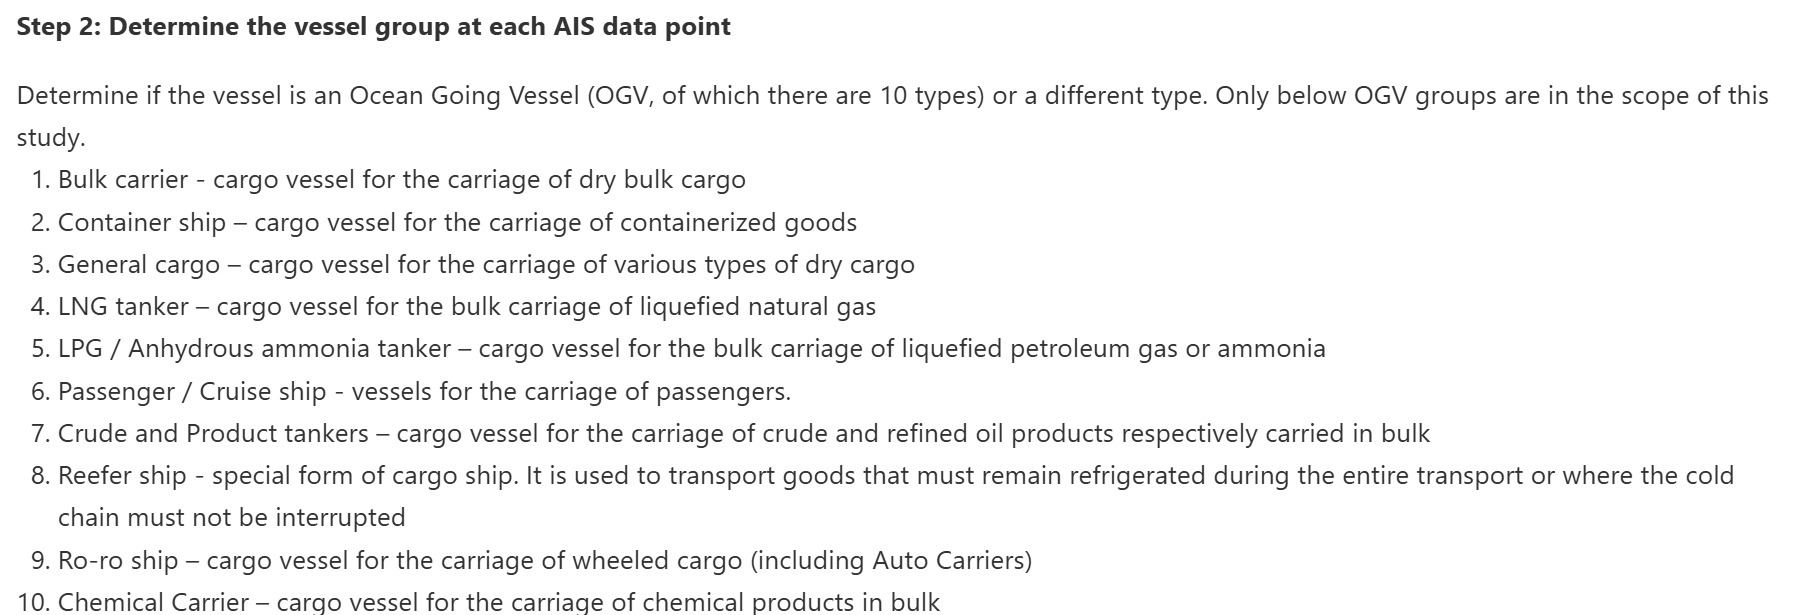

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
port_call = pd.read_csv('dataset\port_call_dataset.csv')
distance_dataset = pd.read_csv('dataset\distance_dataset.csv')
ais_dataset = pd.read_csv('dataset\\ais_dataset.csv')

In [30]:
ais_dataset

,imo,mmsi,vessel_name,date_of_build,vessel_type,group,timestamp,lon,lat,nav_stat,...,terminal,maneuvering_zone,p,vref,sfc_me,sfc_ae,sfc_ab,ael,abl,distance
0,9984730,636023994,SEACON ANTWERP,2024-06-06T00:00:00.000Z,Bulk Carrier,Bulk Carrier,2024-07-28T00:23:32.000Z,104.029630,1.283717,0,...,NaN,NaN,7900.0,14.10,167.10,209.1,300.0,316.0,138.0,6.221528
1,9984730,636023994,SEACON ANTWERP,2024-06-06T00:00:00.000Z,Bulk Carrier,Bulk Carrier,2024-07-28T00:25:02.000Z,104.029755,1.285643,0,...,NaN,NaN,7900.0,14.10,167.10,209.1,300.0,316.0,138.0,0.115910
2,9984730,636023994,SEACON ANTWERP,2024-06-06T00:00:00.000Z,Bulk Carrier,Bulk Carrier,2024-07-28T00:30:01.000Z,104.029420,1.291690,0,...,NaN,NaN,7900.0,14.10,167.10,209.1,300.0,316.0,138.0,0.363603
3,9984730,636023994,SEACON ANTWERP,2024-06-06T00:00:00.000Z,Bulk Carrier,Bulk Carrier,2024-07-28T00:32:51.000Z,104.028160,1.294758,0,...,NaN,NaN,7900.0,14.10,167.10,209.1,300.0,316.0,138.0,0.199119
4,9984730,636023994,SEACON ANTWERP,2024-06-06T00:00:00.000Z,Bulk Carrier,Bulk Carrier,2024-07-28T00:35:02.000Z,104.026474,1.296387,0,...,NaN,NaN,7900.0,14.10,167.10,209.1,300.0,316.0,138.0,0.140720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251764,9739953,477129700,PACIFIC QINGDAO,2016-06-01T00:00:00.000Z,LPG Tanker,LPG Tanker,2024-07-09T21:41:15.000Z,103.684640,1.188230,0,...,NaN,NaN,12420.0,16.54,165.29,204.6,300.0,536.0,367.0,0.053041
251765,9739953,477129700,PACIFIC QINGDAO,2016-06-01T00:00:00.000Z,LPG Tanker,LPG Tanker,2024-07-09T21:45:04.000Z,103.681130,1.187597,0,...,NaN,NaN,12420.0,16.54,165.29,204.6,300.0,536.0,367.0,0.214073
251766,9739953,477129700,PACIFIC QINGDAO,2016-06-01T00:00:00.000Z,LPG Tanker,LPG Tanker,2024-07-09T21:45:37.000Z,103.681800,1.187628,0,...,NaN,NaN,12420.0,16.54,165.29,204.6,300.0,536.0,367.0,0.040347
251767,9739953,477129700,PACIFIC QINGDAO,2016-06-01T00:00:00.000Z,LPG Tanker,LPG Tanker,2024-07-09T21:50:03.000Z,103.673874,1.188243,0,...,NaN,NaN,12420.0,16.54,165.29,204.6,300.0,536.0,367.0,0.477266


In [31]:
ais_dataset.vessel_type.nunique()

29

In [32]:
ais_dataset.vessel_type.value_counts()

vessel_type
Bulk Carrier                                99370
Crude Oil Tanker                            45448
Chemical/Products Tanker                    28364
Container Ship (Fully Cellular)             15509
General Cargo Ship                          10687
Ore Carrier                                  8927
LPG Tanker                                   7261
Crude/Oil Products Tanker                    6274
Products Tanker                              5971
LNG Tanker                                   5663
Vehicles Carrier                             4745
Open Hatch Cargo Ship                        2998
Refrigerated Cargo Ship                      2850
Wood Chips Carrier                           1808
Heavy Load Carrier                           1562
Asphalt/Bitumen Tanker                        776
General Cargo Ship (with Ro-Ro facility)      570
Ro-Ro Cargo Ship                              515
Deck Cargo Ship                               438
Livestock Carrier                     

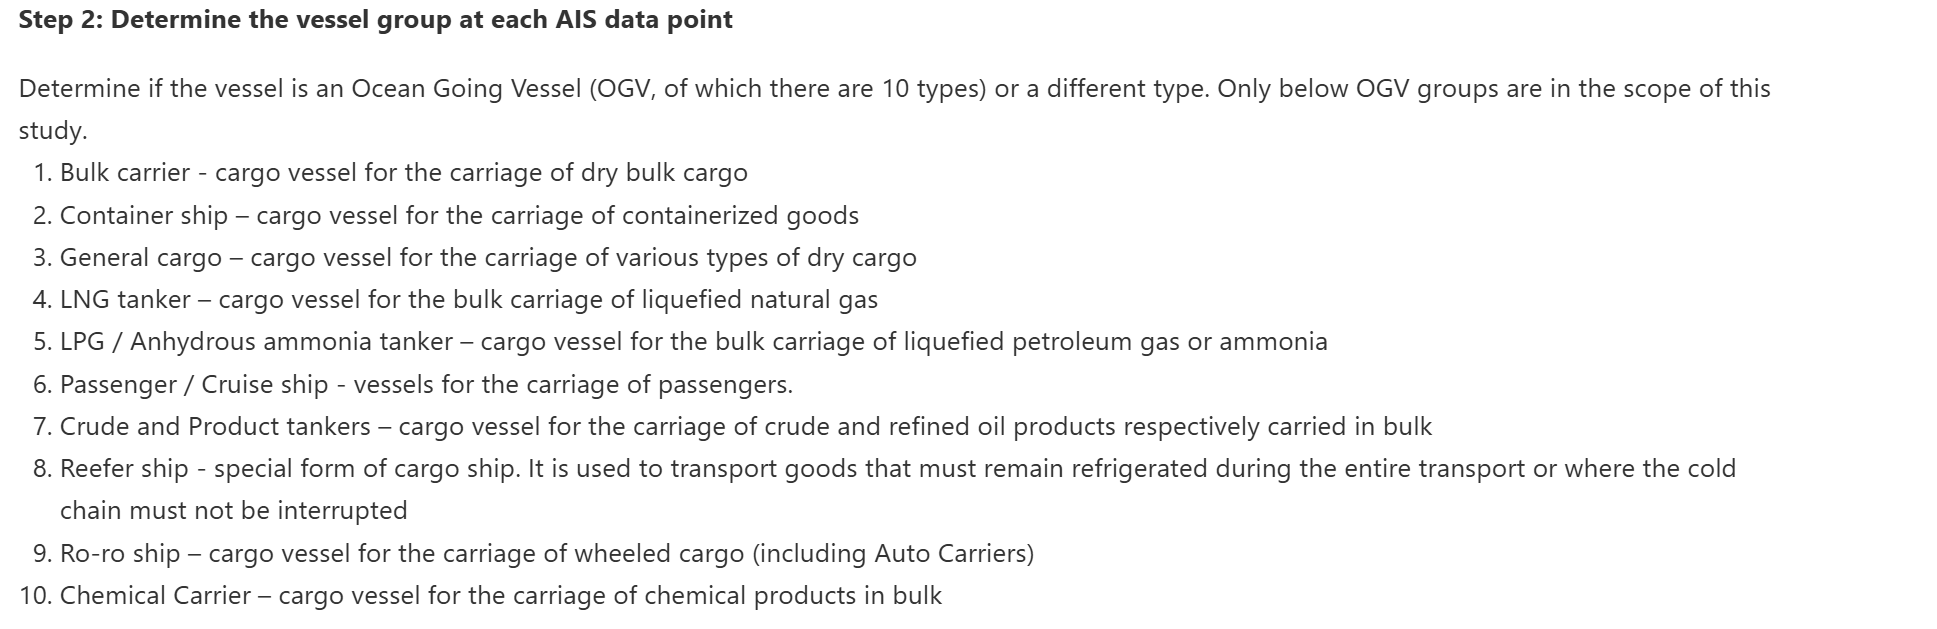

In [33]:
# Initialize the vessel_group column with 'Unknown'
ais_dataset['vessel_group'] = 'Unknown'

# Map vessel types to vessel groups
ais_dataset.loc[(ais_dataset['vessel_type'].isin(['Bulk Carrier', 'Ore Carrier', 'Wood Chips Carrier'])), 'vessel_group'] = "Bulk Carrier"
ais_dataset.loc[(ais_dataset['vessel_type'].isin(['Container Ship (Fully Cellular)'])), 'vessel_group'] = "Container Ship"
ais_dataset.loc[(ais_dataset['vessel_type'].isin(['General Cargo Ship', 'General Cargo Ship (with Ro-Ro facility)', 'Deck Cargo Ship'])), 'vessel_group'] = "General Cargo"
ais_dataset.loc[(ais_dataset['vessel_type'].isin(['LNG Tanker'])), 'vessel_group'] = "LNG tanker"
ais_dataset.loc[(ais_dataset['vessel_type'].isin(['LPG Tanker', 'LPG/Chemical Tanker', 'Combination Gas Tanker (LNG/LPG)'])), 'vessel_group'] = "LPG / Anhydrous Ammonia tanker"
ais_dataset.loc[(ais_dataset['vessel_type'].isin(['Passenger / Cruise ship'])), 'vessel_group'] = "Passenger / Cruise ship"
ais_dataset.loc[(ais_dataset['vessel_type'].isin(['Crude Oil Tanker', 'Crude/Oil Products Tanker', 'Products Tanker', 'Asphalt/Bitumen Tanker', 'Shuttle Tanker', 'Bunkering Tanker'])), 'vessel_group'] = "Crude and Product tankers"
ais_dataset.loc[(ais_dataset['vessel_type'].isin(['Refrigerated Cargo Ship'])), 'vessel_group'] = "Reefer ship"
ais_dataset.loc[(ais_dataset['vessel_type'].isin(['Vehicles Carrier', 'Ro-Ro Cargo Ship'])), 'vessel_group'] = "Ro-ro Ship"
ais_dataset.loc[(ais_dataset['vessel_type'].isin(['Chemical/Products Tanker', 'Chemical Tanker', 'Molten Sulphur Tanker'])), 'vessel_group'] = "Chemical Carrier"

ais_dataset = ais_dataset.loc[ais_dataset['vessel_group'] != 'Unknown']

In [34]:
ais_dataset.vessel_group.value_counts()

vessel_group
Bulk Carrier                      110105
Crude and Product tankers          59011
Chemical Carrier                   28714
Container Ship                     15509
General Cargo                      11695
LPG / Anhydrous Ammonia tanker      7460
LNG tanker                          5663
Unknown                             5502
Ro-ro Ship                          5260
Reefer ship                         2850
Name: count, dtype: int64